# Dependencies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data import

In [10]:
# Import DataFrame for drug names and relative fluorescence (RG) values from drug screening
df_screen = pd.read_csv('Data_files/data_for_descriptor_generation.csv')
df_screen

,Unnamed: 0,cas,name,SMILES,MW,logP,cb_pKa,Group,RG
0,HY-N0480,50-55-5,Reserpine,[H][C@]12C[C@@H](OC(=O)C3=CC(OC)=C(OC)C(OC)=C3...,608.6787,4.05,7.39,1,0.707069
1,HY-17506,83905-01-5,Azithromycin,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,748.9845,3.03,9.57,1,1.054428
2,HY-B0153A,55142-85-3,Ticlopidine,ClC1=CC=CC=C1CN1CCC2=C(C1)C=CS2,263.7860,4.25,7.31,1,1.057829
3,HY-B1287,59729-33-8,Citalopram,CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1,324.3919,3.58,9.78,1,1.015802
4,HY-15287,159989-64-7,Nelfinavir,[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC...,567.7820,4.61,8.18,1,1.156914
...,...,...,...,...,...,...,...,...,...
137,HY-B1684,78266-06-5,Mebrofenin,CC1=CC(C)=C(Br)C(C)=C1NC(=O)CN(CC(O)=O)CC(O)=O,387.2300,-0.39,2.14,6,1.127932
138,HY-18208,167305-00-2,Omapatrilat,[H][C@]12CCC[C@H](N1C(=O)[C@H](CCS2)NC(=O)[C@@...,408.5300,2.15,-3.60,6,1.091463
139,HY-13648,15866-90-7,Incyclinide,[H][C@@]12CC3=C(C(O)=CC=C3)C(=O)C1=C(O)[C@]1(O...,371.3450,-0.38,-1.20,6,0.890418
140,HY-B0960,127-71-9,Sulfabenzamide,NC1=CC=C(C=C1)S(=O)(=O)NC(=O)C1=CC=CC=C1,276.3110,1.69,2.09,6,1.012424


In [11]:
# Import molecular descriptors generated using ochem.eu
descriptors = pd.read_csv('Data_files/descriptors_screening_data.csv')
descriptors

,SMILES,CASRN,NAME,ERROR,MW,AMW,Sv,Se,Sp,Si,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
0,C12CC(OC(=O)C3=CC(OC)=C(OC)C(OC)=C3)C(OC)C(C(=...,50-55-5,reserpine,-,608.8,7.247,51.49,84.94,53.57,94.77,...,0,6.000,8.667,6.667,34.17,0.7765,9.000,0.20450,30.00,8.249
1,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,83905-01-5,Azithromycin,-,749.1,6.041,67.06,124.10,72.11,142.00,...,0,0.000,0.000,0.000,48.08,0.9247,13.030,0.25050,58.19,15.960
2,ClC1=CC=CC=C1CN2CCC3=C(C2)C=CS3,55142-85-3,Ticlopidine,-,263.8,8.510,20.72,30.69,22.84,34.27,...,0,0.000,0.000,0.000,0.00,0.0000,0.000,0.00000,0.00,0.000
3,CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C3=CC=C(F)C=C3,59729-33-8,Citalopram,-,324.4,7.210,28.41,44.88,30.02,50.70,...,0,0.000,6.000,6.000,15.00,0.6250,1.000,0.04167,9.11,1.732
4,C12CCCCC1CN(CC(O)C(CSC3=CC=CC=C3)NC(=O)C4=C(C)...,159989-64-7,nelfinavir,-,567.9,6.681,50.17,84.25,54.47,95.97,...,0,1.200,3.600,9.600,35.10,0.8775,6.800,0.17000,37.32,7.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,CC1=CC(C)=C(Br)C(C)=C1NC(=O)CN(CC(O)=O)CC(O)=O,78266-06-5,MEBROFENIN,-,387.3,9.220,26.38,43.02,27.49,47.62,...,0,0.000,0.000,0.000,0.00,0.0000,0.000,0.00000,0.00,0.000
138,C12CCCC(N1C(=O)C(CCS2)NC(=O)C(S)CC3=CC=CC=C3)C...,167305-00-2,Omapatrilat,-,408.6,8.012,32.07,51.39,34.50,57.24,...,0,0.000,1.500,4.500,23.75,0.8796,6.000,0.22220,28.61,8.513
139,C12CC3=C(C(O)=CC=C3)C(=O)C1=C(O)C4(O)C(=O)C(C(...,15866-90-7,Incyclinide,-,371.4,8.440,29.24,45.46,29.28,49.29,...,0,2.667,2.000,3.333,19.83,0.7346,6.667,0.24690,16.41,6.644
140,NC1=CC=C(C=C1)S(=O)(=O)NC(=O)C2=CC=CC=C2,127-71-9,sulfabenzamide,-,276.3,8.914,21.01,31.68,21.83,34.62,...,0,0.000,0.000,0.000,0.00,0.0000,0.000,0.00000,0.00,0.000


# Combining data and descriptors into one DataFrame

In [12]:
data = descriptors.drop('ERROR',axis=1)
data['RG'] = df_screen['RG']
data['Group'] = df_screen['Group']
data['NAME'] = df_screen['name']
data['SMILES'] = df_screen['SMILES']
data['CASRN'] = df_screen['cas']
data['cb_pKa'] = df_screen['cb_pKa']
data

,SMILES,CASRN,NAME,MW,AMW,Sv,Se,Sp,Si,Mv,...,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment,RG,Group,cb_pKa
0,[H][C@]12C[C@@H](OC(=O)C3=CC(OC)=C(OC)C(OC)=C3...,50-55-5,Reserpine,608.8,7.247,51.49,84.94,53.57,94.77,0.6129,...,6.667,34.17,0.7765,9.000,0.20450,30.00,8.249,0.707069,1,7.39
1,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,83905-01-5,Azithromycin,749.1,6.041,67.06,124.10,72.11,142.00,0.5408,...,0.000,48.08,0.9247,13.030,0.25050,58.19,15.960,1.054428,1,9.57
2,ClC1=CC=CC=C1CN1CCC2=C(C1)C=CS2,55142-85-3,Ticlopidine,263.8,8.510,20.72,30.69,22.84,34.27,0.6685,...,0.000,0.00,0.0000,0.000,0.00000,0.00,0.000,1.057829,1,7.31
3,CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1,59729-33-8,Citalopram,324.4,7.210,28.41,44.88,30.02,50.70,0.6313,...,6.000,15.00,0.6250,1.000,0.04167,9.11,1.732,1.015802,1,9.78
4,[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC...,159989-64-7,Nelfinavir,567.9,6.681,50.17,84.25,54.47,95.97,0.5903,...,9.600,35.10,0.8775,6.800,0.17000,37.32,7.605,1.156914,1,8.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,CC1=CC(C)=C(Br)C(C)=C1NC(=O)CN(CC(O)=O)CC(O)=O,78266-06-5,Mebrofenin,387.3,9.220,26.38,43.02,27.49,47.62,0.6282,...,0.000,0.00,0.0000,0.000,0.00000,0.00,0.000,1.127932,6,2.14
138,[H][C@]12CCC[C@H](N1C(=O)[C@H](CCS2)NC(=O)[C@@...,167305-00-2,Omapatrilat,408.6,8.012,32.07,51.39,34.50,57.24,0.6288,...,4.500,23.75,0.8796,6.000,0.22220,28.61,8.513,1.091463,6,-3.60
139,[H][C@@]12CC3=C(C(O)=CC=C3)C(=O)C1=C(O)[C@]1(O...,15866-90-7,Incyclinide,371.4,8.440,29.24,45.46,29.28,49.29,0.6645,...,3.333,19.83,0.7346,6.667,0.24690,16.41,6.644,0.890418,6,-1.20
140,NC1=CC=C(C=C1)S(=O)(=O)NC(=O)C1=CC=CC=C1,127-71-9,Sulfabenzamide,276.3,8.914,21.01,31.68,21.83,34.62,0.6777,...,0.000,0.00,0.0000,0.000,0.00000,0.00,0.000,1.012424,6,2.09


In [13]:
# Setting threshold for binary data to use in classification model
# where RG < 0.5 is True and RG >= 0.5 is False for siRNA complexation
threshold = 0.5
data['RG_binary'] = data['RG'] < threshold

# Output number of "hits" from screening assay
sum(data['RG_binary'])

18

# Data Output

In [14]:
# Output data to use in machine learning model
data.to_csv('Data_files/RG_for_ML.csv',index=False)

# Plotting fluorescence data by group

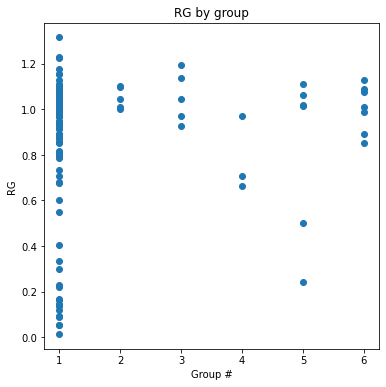

In [8]:
# Plot RG signal by group
plt.figure(figsize=(6,6))
plt.scatter(data['Group'],data['RG'])
plt.title('RG by group')
plt.xlabel('Group #')
plt.ylabel('RG')
plt.show()

# Correlation analysis

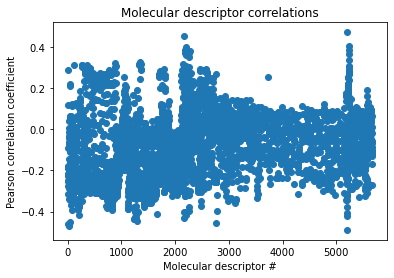

In [21]:
# Calculating Pearson r for all descriptors with RG fluorescence reading
corr_coeffs = [data['RG'].
               corr(data[col]) 
               for col in 
               data.iloc[:,:-4].select_dtypes('number').columns]

plt.scatter(np.arange(1,len(corr_coeffs)+1),corr_coeffs)
plt.title('Molecular descriptor correlations')
plt.xlabel('Molecular descriptor #')
plt.ylabel('Pearson correlation coefficient')
plt.show()

In [22]:
# Output correlation coefficients for molecular descriptors with the strongest positive and negative correlation
print(max(corr_coeffs))
print(data.iloc[:,:-4].select_dtypes('number').columns[np.nanargmax(corr_coeffs)])
print(min(corr_coeffs))
print(data.iloc[:,:-4].select_dtypes('number').columns[np.nanargmin(corr_coeffs)])

0.4720174507079304
ESOL
-0.48956932650116197
ALOGP2


In [24]:
corr_out = pd.DataFrame(corr_coeffs)
corr_out['Name'] = data.iloc[:,:-4].select_dtypes('number').columns
corr_out.to_csv('Data_files/For_plotting/corr_coeffs_set_1.csv')